In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from qutip import *
plt.rcParams.update({
    "text.usetex": True})
plt.rcParams.update({'font.size': 24})


In [73]:
sx = sigmax()
sy = sigmay()
sz = sigmaz()

omega = 5
kappa = omega/4
tau = omega

H = (omega/2)*sy
L = np.sqrt(kappa)*sz
sc_ops = [L]

t0 = 0
dt = 0.001
t = np.arange(t0, tau, dt)

psi0 = fock(2,0)
rho0 = ket2dm(psi0)

Lio = liouvillian(H, sc_ops)
Ivec = operator_to_vector(identity(2)).dag()

## Speed limit of unconditional dynamics

\begin{equation}
    \mathcal{V} = - \overline{tr[{\rho_{0} \mathcal{L}\rho_{t}}]}
\end{equation}

and QSL defined by 
\begin{equation}
    \mathcal{V}_{QSL} = \frac{1}{\tau}\int_{0}^{\tau} ||\mathcal{L}(\rho_{t})|||
\end{equation}

In [74]:
result = mesolve(H, psi0, t, c_ops=sc_ops)
ez = np.array([expect(sz, psi) for psi in result.states])

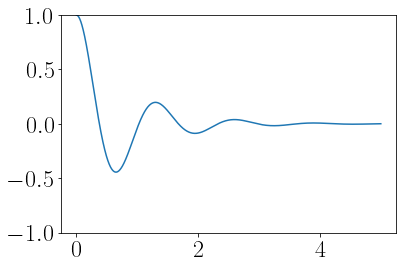

In [75]:
plt.plot(t, ez)
plt.ylim([-1,1])
plt.show()

In [76]:
dv = []
dvQSL = []
for rhot in result.states:
    pt = Lio*operator_to_vector(rhot)
    dv.append((rho0*vector_to_operator(pt)).tr())
    # dvQSL.append(np.sqrt((pt.dag()*pt).tr()))
    dvQSL.append(max(np.linalg.svd(vector_to_operator(pt).full())[1]))
    
v = - np.sum(dv)*dt/tau
vQSL = np.sum(dvQSL)*dt/tau

## Make stochastic simulations of trajectories

In [77]:
results = smesolve(H, rho0, t, sc_ops=sc_ops, ntraj=1000, solver='euler')

10.0%. Run time:  75.84s. Est. time left: 00:00:11:22
20.0%. Run time: 142.76s. Est. time left: 00:00:09:31
30.0%. Run time: 212.58s. Est. time left: 00:00:08:16
40.0%. Run time: 281.76s. Est. time left: 00:00:07:02
50.0%. Run time: 354.65s. Est. time left: 00:00:05:54
60.0%. Run time: 420.28s. Est. time left: 00:00:04:40
70.0%. Run time: 499.80s. Est. time left: 00:00:03:34
80.0%. Run time: 581.71s. Est. time left: 00:00:02:25
90.0%. Run time: 647.46s. Est. time left: 00:00:01:11
Total run time: 733.16s


In [82]:
ezs = np.real(np.array([[expect(sz, rhoi) for rhoi in rhos] for rhos in results.states]))

In [83]:
ezs[0]

array([ 1.        ,  1.        ,  0.999975  , ..., -0.50492276,
       -0.42774845, -0.42396154])

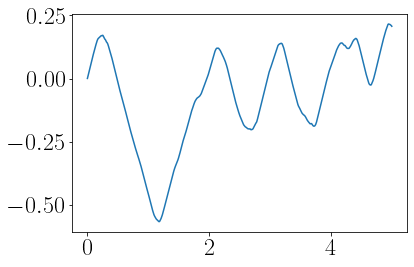

In [85]:
plt.plot(t, np.cumsum(ezs[0])*dt)

plt.show()

In [86]:
Lcal = lambda x : (rho0*vector_to_operator(Lio*operator_to_vector(x))).tr()
Ical = lambda x : np.sqrt(kappa)*(rho0*(sz*x + x*sz - 2*expect(sz,x)*x)).tr()

vL = []
vI = []
for traj, noise in zip(results.states,results.noise):
    
    dW = noise.T[0,0]
    
    vLtemp = []
    vItemp = []
    for traji, dWi in zip(traj, dW):
        
    
        vLtemp.append(Lcal(traji))
        vItemp.append(Ical(traji)*dWi)

    vL.append(-np.sum(vLtemp)*dt/tau)
    vI.append(np.sum(vItemp)/tau)

    
V = (np.array(vL) - np.array(vI))

/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/data.py:124: RuntimeWarning: overflow encountered in multiply
  return self._with_data(self.data * other)
/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_23965/2547552004.py:2: RuntimeWarning: invalid value encountered in multiply
  Ical = lambda x : np.sqrt(kappa)*(rho0*(sz*x + x*sz - 2*expect(sz,x)*x)).tr()


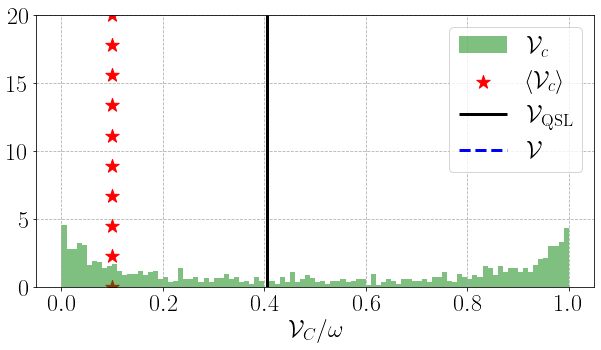

In [118]:
fig = plt.figure(figsize=(10,5))

gg = 10
nmx = 20
plt.hist(tau*V, bins=100, density=True, alpha=0.5, color='g', range=[0,1], label=r'$\mathcal{V}_{c}$')
plt.scatter((v)*np.ones(gg), np.linspace(0, nmx, gg), marker='*', color='r', s=200, label=r'$\langle \mathcal{V}_{c}\rangle$')
plt.vlines(vQSL, 0, nmx, linestyle='-', color='k', linewidth=3, label=r'$ \mathcal{V}_{\rm QSL}$')
plt.vlines(tau*np.mean(V), 0, nmx, linestyle='--', color='b', linewidth=3, label=r'$ \mathcal{V}$')


plt.ylim([0, nmx])
# plt.xlim([0, 1])
plt.grid(linestyle='--')
plt.legend()
plt.xlabel(r'$\mathcal{V}_{C}/\omega$')

plt.show()

# fig.savefig('speed_dist_omega=15.png', bbox_inches='tight', dpi=200) 

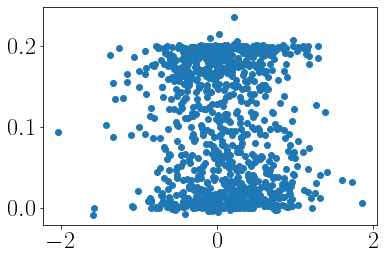

In [89]:
tzs = np.sum(ezs, axis=1)*dt

zvals = np.linspace(0, 1, 100)

plt.scatter(tzs, V)
plt.yl
# plt.plot(zvals, np.sqrt(1-zvals**2))
# plt.plot(zvals, np.log(2 - np.exp(zvals)))
# plt.yscale('log')
# plt.xscale('log')

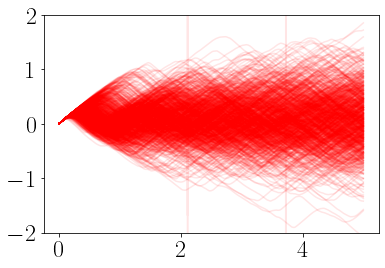

In [113]:
sum_ezs = np.cumsum(ezs, axis=1)*dt

plt.plot(t, sum_ezs[:, :].T, color='r', alpha=0.1)

plt.ylim([-2,2])

plt.show()

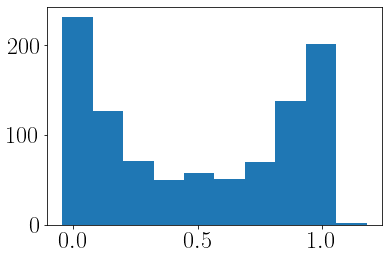

In [115]:
plt.hist(tau*V)

plt.show()